In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('../csv/dataset_ml.csv')

In [3]:
df=df.drop(['id_advert','city'],axis=1)

In [4]:
# Séparer les variables indépendantes (X) de la variable cible (y)
X = df.drop("scam", axis=1)
y = df["scam"]

In [5]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Définir les colonnes nécessitant une normalisation
numerical_cols = ['size','price','other_campus_dressing','other_campus_sell','hype_products_dressing',
                 'hype_products_sell','item_count','total_items_count','given_item_count','taken_item_count',
                 'feedback_reputation','followers_count','following_count']
binary_categorical_cols = ['price_decimal','ressell_price','promoted','identic_title_description','short_description',
                      'secure_description','has_emoji_description','description_user','sell_sneaker_account','photo',
                      'is_publish_photos_agreed','expose_location','verification_facebook','verification_google','verification_phone'] 
other_categorical_cols = ['gender','brand','country_title','modele']

In [7]:
# Définir les transformations pour les colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Normaliser les variables numériques
        ('bin_cat', 'passthrough', binary_categorical_cols),  # Ne rien faire pour les colonnes binaires
        ('other_cat', OneHotEncoder(handle_unknown='ignore'), other_categorical_cols)  # Appliquer OneHotEncoder aux autres colonnes catégorielles
    ])

## Baseline Model : Decision Tree

In [8]:
# Créer le pipeline avec le préprocesseur et le modèle Decison Tree
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])


In [9]:
# Entraîner le modèle
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['size', 'price',
                                                   'other_campus_dressing',
                                                   'other_campus_sell',
                                                   'hype_products_dressing',
                                                   'hype_products_sell',
                                                   'item_count',
                                                   'total_items_count',
                                                   'given_item_count',
                                                   'taken_item_count',
                                                   'feedback_reputation',
                                                   'followers_count',
                                                   'following_count']),
                                                 ('bin_cat', 'passthrough',...
                                                   'secure_description',
                                                   'has_emoji_description',
                                                   'description_user',
                                                   'sell_sneaker_account',
                                                   'photo',
                                                   'is_publish_photos_agreed',
                                                   'expose_location',
                                                   'verification_facebook',
                                                   'verification_google',
                                                   'verification_phone']),
                                                 ('other_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'brand',
                                                   'country_title',
                                                   'modele'])])),
                ('classifier', DecisionTreeClassifier())])

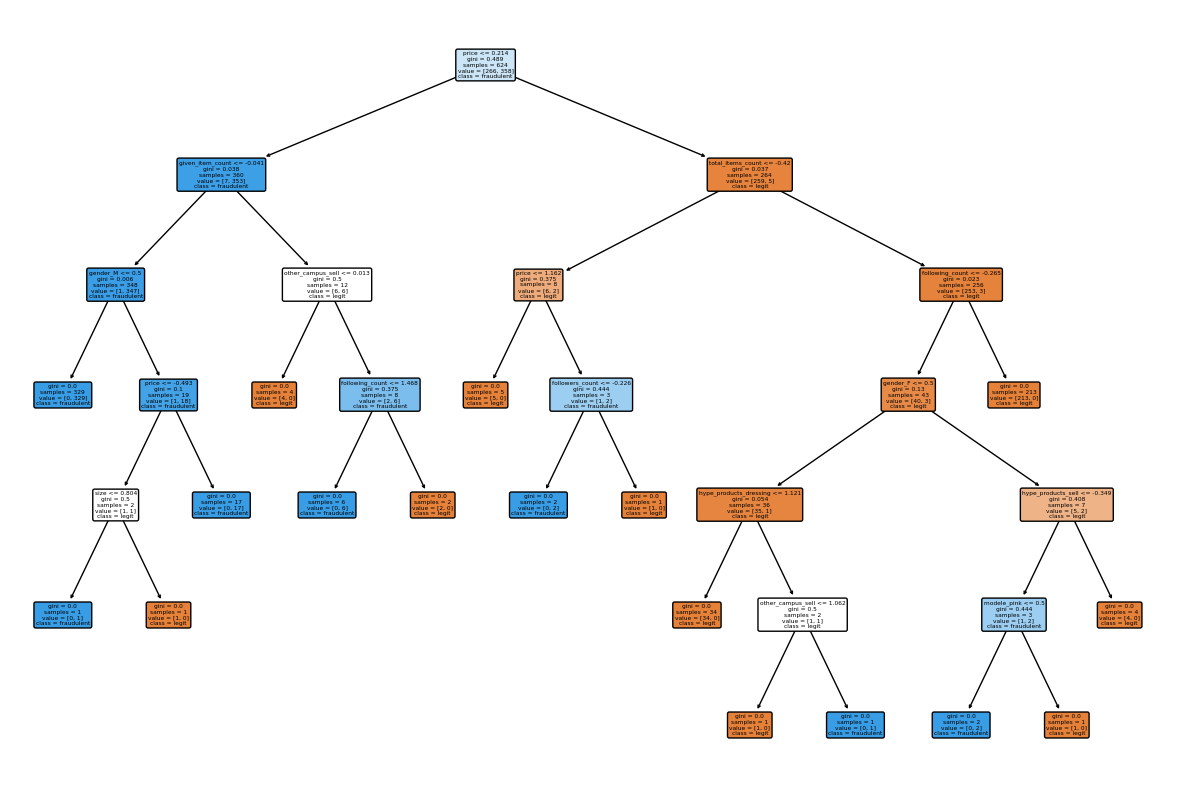

In [10]:
preprocessed_columns = preprocessor.named_transformers_['other_cat'].get_feature_names_out(other_categorical_cols)
all_feature_names = numerical_cols + binary_categorical_cols + list(preprocessed_columns)

tree_model = pipeline.named_steps['classifier']
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=all_feature_names, class_names=["legit", "fraudulent"], rounded=True)
plt.show()

In [11]:
# Prédire sur l'ensemble d'entraînement
y_train_pred = pipeline.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred = pipeline.predict(X_test)

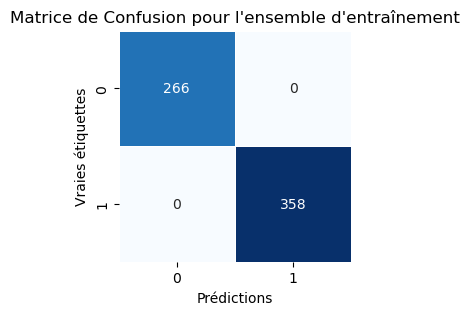

In [12]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_train, y_train_pred)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble d\'entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [13]:
# Afficher les métriques de classification pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print(classification_report(y_train, y_train_pred))

Métriques pour l'ensemble d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       358

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



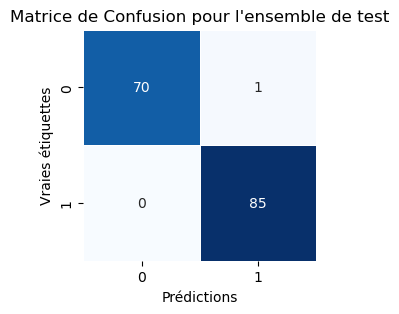

In [14]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble de test')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [15]:
# Afficher les métriques de classification pour l'ensemble de test
print("Métriques pour l'ensemble de test:")
print(classification_report(y_test, y_test_pred))

Métriques pour l'ensemble de test:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        85

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [16]:
# ligne avec des erreurs
incorrect_predictions = X_test[y_test != y_test_pred]
incorrect_predictions

,modele,size,brand,price,price_decimal,ressell_price,promoted,identic_title_description,short_description,secure_description,...,followers_count,following_count,gender,photo,is_publish_photos_agreed,expose_location,country_title,verification_facebook,verification_google,verification_phone
156,crystal,41.0,adidas,85.0,0,129,0,0,0,0,...,3,9,F,1,0,0,France,0,1,1


## Baseline Model : Random Forest

In [17]:
# Créer le pipeline avec le préprocesseur et le modèle RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [18]:
# Entraîner le modèle
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['size', 'price',
                                                   'other_campus_dressing',
                                                   'other_campus_sell',
                                                   'hype_products_dressing',
                                                   'hype_products_sell',
                                                   'item_count',
                                                   'total_items_count',
                                                   'given_item_count',
                                                   'taken_item_count',
                                                   'feedback_reputation',
                                                   'followers_count',
                                                   'following_count']),
                                                 ('bin_cat', 'passthrough',...
                                                   'secure_description',
                                                   'has_emoji_description',
                                                   'description_user',
                                                   'sell_sneaker_account',
                                                   'photo',
                                                   'is_publish_photos_agreed',
                                                   'expose_location',
                                                   'verification_facebook',
                                                   'verification_google',
                                                   'verification_phone']),
                                                 ('other_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'brand',
                                                   'country_title',
                                                   'modele'])])),
                ('classifier', RandomForestClassifier())])

In [19]:
# Prédire sur l'ensemble d'entraînement
y_train_pred = pipeline.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred = pipeline.predict(X_test)

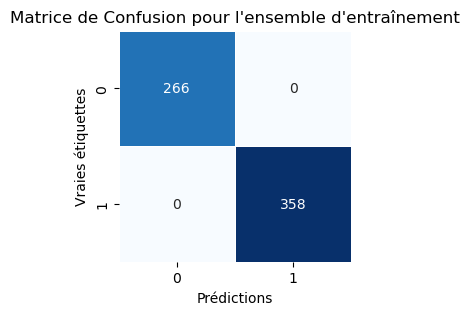

In [21]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_train, y_train_pred)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble d\'entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [22]:
# Afficher les métriques de classification pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print(classification_report(y_train, y_train_pred))

Métriques pour l'ensemble d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       358

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



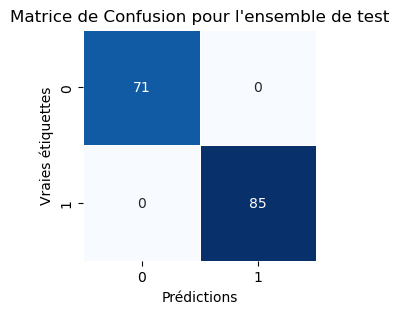

In [23]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble de test')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [24]:
# Afficher les métriques de classification pour l'ensemble de test
print("Métriques pour l'ensemble de test:")
print(classification_report(y_test, y_test_pred))

Métriques pour l'ensemble de test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        85

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [25]:
# ligne avec des erreurs
incorrect_predictions = X_test[y_test != y_test_pred]
incorrect_predictions

,modele,size,brand,price,price_decimal,ressell_price,promoted,identic_title_description,short_description,secure_description,...,followers_count,following_count,gender,photo,is_publish_photos_agreed,expose_location,country_title,verification_facebook,verification_google,verification_phone


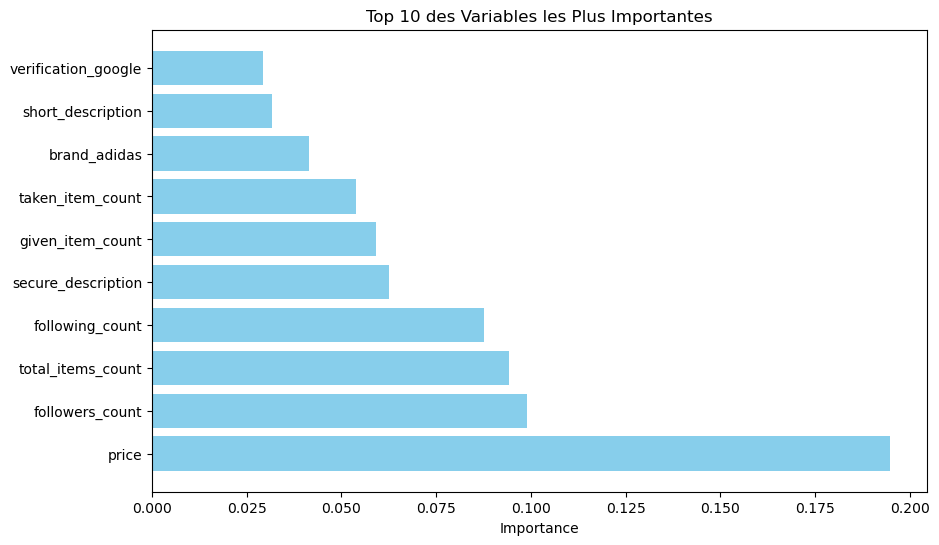

In [26]:
# Accéder à l'importance des variables
rf_model = pipeline.named_steps['classifier']
importances = rf_model.feature_importances_
preprocessed_columns = numerical_cols + binary_categorical_cols + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(other_categorical_cols))

feature_importances = pd.DataFrame({'Variable': preprocessed_columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Variable'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 des Variables les Plus Importantes')
plt.show()

## Optimisation

In [27]:
# Définition du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [28]:
# Définition des paramètres de la grille
param_grid = {
    'classifier__n_estimators': [20,30,50,100, 200],
    'classifier__max_depth': [None,2,3,5, 10, 20, 30]
}

In [29]:
#Utilisation du gridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)

In [30]:
#Entraînement du modèle
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['size',
                                                                          'price',
                                                                          'other_campus_dressing',
                                                                          'other_campus_sell',
                                                                          'hype_products_dressing',
                                                                          'hype_products_sell',
                                                                          'item_count',
                                                                          'total_items_count',
                                                                          'given_item_count',
                                                                          'taken_item_count',
                                                                          'feedback_reputation',
                                                                          'followers_count',
                                                                          'following_count'...
                                                                          'is_publish_photos_agreed',
                                                                          'expose_location',
                                                                          'verification_facebook',
                                                                          'verification_google',
                                                                          'verification_phone']),
                                                                        ('other_cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'brand',
                                                                          'country_title',
                                                                          'modele'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 2, 3, 5, 10, 20, 30],
                         'classifier__n_estimators': [20, 30, 50, 100, 200]},
             scoring='f1')

In [31]:
# Meilleurs paramètres
best_model = grid_search.best_estimator_
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

Meilleurs paramètres trouvés :  {'classifier__max_depth': 20, 'classifier__n_estimators': 20}


In [32]:
# Prédire sur l'ensemble d'entraînement
y_train_pred_best = best_model.predict(X_train)

# Prédire sur l'ensemble de test
y_test_pred_best = best_model.predict(X_test)

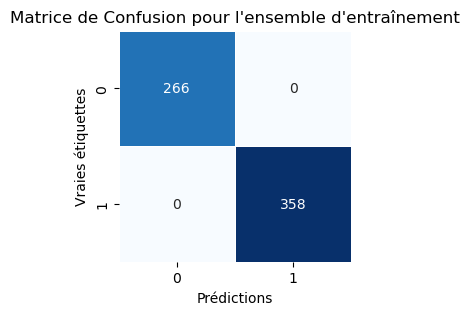

In [33]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_train, y_train_pred_best)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble d\'entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [34]:
# Afficher les métriques de classification pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print(classification_report(y_train, y_train_pred_best))

Métriques pour l'ensemble d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       358

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



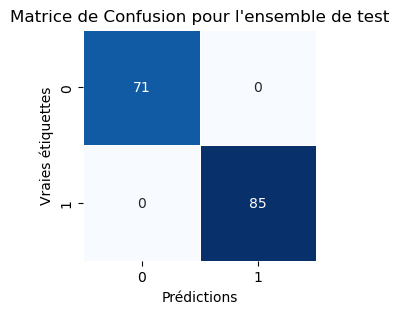

In [35]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred_best)

# Utiliser Seaborn pour l'affichage
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Matrice de Confusion pour l\'ensemble de test')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [36]:
# Afficher les métriques de classification pour l'ensemble de test
print("Métriques pour l'ensemble de test:")
print(classification_report(y_test, y_test_pred_best))

Métriques pour l'ensemble de test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        85

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [37]:
# lignes avec des erreurs
incorrect_predictions = X_test[y_test != y_test_pred_best]
incorrect_predictions

,modele,size,brand,price,price_decimal,ressell_price,promoted,identic_title_description,short_description,secure_description,...,followers_count,following_count,gender,photo,is_publish_photos_agreed,expose_location,country_title,verification_facebook,verification_google,verification_phone


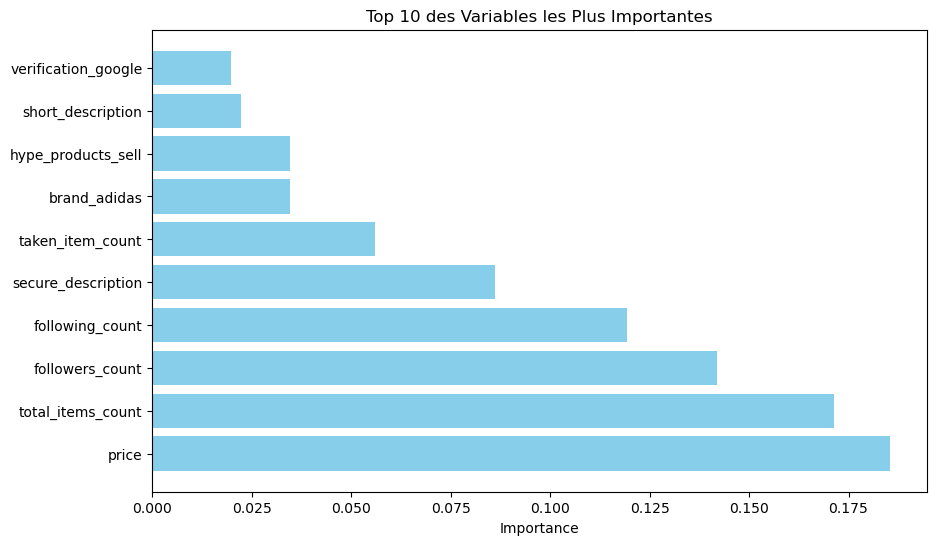

In [38]:
# Accéder au meilleur modèle après la recherche sur grille
preprocessed_columns = numerical_cols + binary_categorical_cols + list(grid_search.best_estimator_['preprocessor'].transformers_[2][1].get_feature_names_out(other_categorical_cols))
best_rf_model = grid_search.best_estimator_['classifier']
importances = best_rf_model.feature_importances_

feature_importances = pd.DataFrame({'Variable': preprocessed_columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Variable'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 des Variables les Plus Importantes')
plt.show()
